# データセットの用意
MNISTデータセットを使用します。以下のコードを実行すればKerasによりデータセットをダウンロードし、展開まで行えます。
データセットをダウンロードするコード

##### MNISTとは？
画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれています。
##### 画像データとは？
デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### モジュールとデータのインポート

In [209]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

### データの１次元化と正規化

In [61]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [63]:
#データの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])


print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 784)
(10000, 784)
float64
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

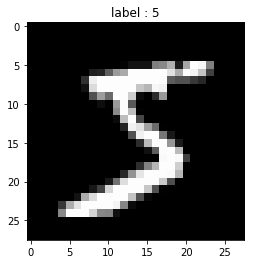

In [64]:
# データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

###### 発展的話題  

画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。  
例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

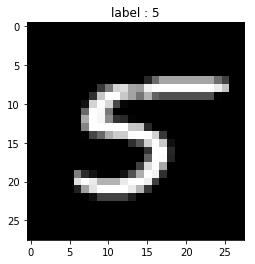

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [156]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。  
uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。  
それを防ぐためには次のように引数を入れてください。

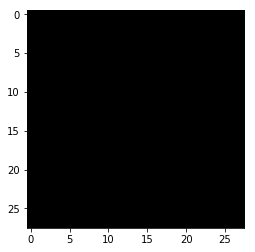

In [68]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

### yラベルのワンホットエンコーディング

In [293]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


# 【問題1】ニューラルネットワーク分類器のクラスを作成
ニューラルネットワーク分類器のクラスScratchSimpleNeuralNetrowkClassifierを作成してください。  
以下が雛形です。基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様です。

In [367]:
import math
import pandas as pd

#########################
# ニューラルネットワークのクラス
#########################
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    
    """

    def __init__(self,lr=0.01,epoch=20,batch_size=10,n_nodes_1=400,n_nodes_2=200,n_nodes_output=10,verbose=True,activation='tanh'):
        self.verbose = verbose
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size
        self.n_nodes_1 = n_nodes_1 #入力層のノード数
        self.n_nodes_2 = n_nodes_2 #2層目のノード数
        self.n_nodes_output = n_nodes_output #出力層のノード数
        self.activation = activation
        self.loss_list = [] # 損失関数となる交差エントロピーを格納してゆくリスト
        self.val_loss_list = [] # 損失関数となる交差エントロピーを格納してゆくリスト
        
        #####################
        #self.X_val、self.y_valの存在を宣言しておく
        #####################
        self.X_val = None
        self.y_val = None        
    
    def _sigmoid(self,X): #シグモイド関数を作成
        return 1 / (1 + math.e**-X)
    
    
    def _deriv_sigmoid(self,x): #シグモイド関数の導関数を作成
        return self._sigmoid(x)*(1 - self._sigmoid(x))

    
    def _softmax(self,X):
        c = np.max(X)
        exp_X = np.exp(X-c) #オーバーフローを防止
        sum_exp_X = np.sum(exp_X, axis=1, keepdims=True)
        exp_X = np.exp(X)
        y = exp_X / sum_exp_X
        return y  
    
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # 検証データを格納する
        self.X_val = X_val
        self.y_val = y_val
        
        #one_hotエンコーディング
        y_ohe = np.array(pd.get_dummies(y, dummy_na=False))
        
        #ミニバッチを取得するクラスをインスタンス化
        get_mini_batch = GetMiniBatch(X, y_ohe, self.batch_size)
        

        #valがあるとき
        if (self.X_val is not None) and (self.y_val is not None):
            
            #one-hotエンコーディングを実施
            self.y_val_ohe = np.array(pd.get_dummies(self.y_val, dummy_na=False))

            #ミニバッチを取得するクラスをインスタンス化  
            get_val_mini_batch = GetMiniBatch(self.X_val, self.y_val_ohe, self.batch_size)
        
        
        ##################
        # 重みの初期化設定
        ##################
        #ガウス分布の標準偏差によって重みを作成
        n_features = X.shape[1] # 特徴量の数
        sigma = 0.01 # ガウス分布の標準偏差

        #３層の重みとバイアスの初期値を作成
        self.W_1 = sigma * np.random.randn(n_features, self.n_nodes_1) # W1: (784, 400)
        self.W_2 = sigma * np.random.randn(self.n_nodes_1, self.n_nodes_2) #self.W_2:(400,200)
        self.W_output = sigma * np.random.randn(self.n_nodes_2, self.n_nodes_output) #self.W_2:(200,10)
        self.B_1 = np.zeros(self.n_nodes_1).reshape(-1,) #(400,)
        self.B_2 = np.zeros(self.n_nodes_2).reshape(-1,) #(200,)
        self.B_output = np.zeros(self.n_nodes_output).reshape(-1,)  #(400,)
        
        
        #############
        # 学習の開始
        #############
        
        
        for epoch in range(self.epoch):
            
            #ミニバッチごとの損失を加算
            mini_batch_loss = 0

            #ミニバッチに分けて更新を繰り返す
            for mini_X_train, mini_y_train in get_mini_batch:

                #フォワードプロバケーションを実施
                Z_1, Z_2, Z_output = self._forward(mini_X_train)
                
                #バックプロバケーションを実施
                delta_W_1, delta_W_2, delta_W_output, delta_B_1, delta_B_2, delta_B_output \
                    = self._backforward(mini_X_train, mini_y_train, Z_1, Z_2, Z_output)

                 
                #重みの更新
                #第一層
                self.W_output -= self.lr * delta_W_output / delta_B_output.shape[0] #方向はあってる？
                self.B_output -= self.lr * np.mean(delta_B_output,axis=0)
                #第２層
                self.W_2 -= self.lr * delta_W_2 / delta_B_2.shape[0]  #方向はあってる？
                self.B_2 -= self.lr * np.mean(delta_B_2,axis=0)        
                #第1層
                self.W_1 -= self.lr * delta_W_1 / delta_B_1.shape[0]  #方向はあってる？
                self.B_1 -= self.lr * np.mean(delta_B_1,axis=0)               
                
                #ミニバッチごとの損失を加算
                mini_batch_loss += self._cross_entropy(mini_y_train, Z_output)
                
                
            #valがある場合の処理
            if (self.X_val is not None) and (self.y_val is not None):
                #ミニバッチごとの損失を加算
                mini_batch_val_loss = 0               

                #イテレーション数実行
                for mini_X_val, mini_y_val in get_val_mini_batch:

                    _, _, Z_output_val = self._forward(mini_X_val)

                    #ミニバッチごとの損失を加算
                    mini_batch_val_loss += self._cross_entropy(mini_y_val, Z_output_val)
                


            #1エポック終了時の平均損失をリストに格納
            self.loss_list.append(mini_batch_loss / get_mini_batch._stop)
            
            
            #valがある場合の１エポック終了時の平均素質をリストに格納
            if (self.X_val is not None) and (self.y_val is not None):
                self.val_loss_list.append(mini_batch_val_loss / get_val_mini_batch._stop)
            



            #学習過程を出力する場合
            if self.verbose == True:
                print('epoch:' + str(epoch) + '-train_loss:' + str(self.loss_list[epoch]))
                
                #検証用データがある場合
                if (self.X_val is not None) and (self.y_val is not None):
                      print('epoch:' + str(epoch) + '-val_loss:',str(self.val_loss_list[epoch]))
                



    def _forward(self, X):
        '''
        フォワードプロバケーションの関数
        ''' 
        
        #活性化関数がハイパボリックタンジェント関数の時
        if self.activation == 'tanh':
            #1層目
            A_1 = np.dot(X, self.W_1) + self.B_1 #(batch_size, n_nodes1)
            Z_1 = np.tanh(A_1) #(batch_size, n_nodes1)

            #2層目
            A_2 = np.dot(Z_1, self.W_2) + self.B_2#(batch_size, n_nodes2)
            Z_2 = np.tanh(A_2) #(batch_size, n_nodes2)

            #3層目
            A_output = np.dot(Z_2, self.W_output) + self.B_output#(batch_size, n_output)
            Z_output = self._softmax(A_output) #(batch_size, n_output) 
            
        #活性化関数がシグモイド関数の時
        else:
            #1層目
            A_1 = np.dot(X, self.W_1) + self.B_1 #(batch_size, n_nodes1)
            Z_1 = self._sigmoid(A_1) #(batch_size, n_nodes1)

            #2層目
            A_2 = np.dot(Z_1, self.W_2) + self.B_2#(batch_size, n_nodes2)
            Z_2 = self._sigmoid(A_2) #(batch_size, n_nodes2)

            #3層目
            A_output = np.dot(Z_2, self.W_output) + self.B_output#(batch_size, n_output)
            Z_output = self._softmax(A_output) #(batch_size, n_nodes2)


        return Z_1, Z_2, Z_output
    
    def _backforward(self, X, y, Z_1, Z_2, Z_output):
        '''
        バックプロバケーションの関数
        '''
        
        #if y.ndim == 1:
        #    y = y.reshape(-1, 1)
        
        #ハイパボリックタンジェント関数の時
        if self.activation == 'tanh':
            #3層目
            delta_A_output = Z_output - y #(n_nodes2, n_output)
            delta_B_output = delta_A_output #(n_nodes2, n_output)
            delta_w_output = np.dot(Z_2.T, delta_A_output) #(n_nodes2, n_output)
            delta_Z_2 = np.dot(delta_A_output, self.W_output.T) #(batch_size, n_nodes2)
            
            #2層目
            delta_A_2 = delta_Z_2 * (1 - Z_2**2) #(batch_size, n_nodes2)
            delta_B_2 = delta_A_2 #(batch_size, n_nodes2)
            delta_W_2 = np.dot(Z_1.T, delta_A_2) #(n_nodes1, n_nodes2)
            delta_Z_1 = np.dot(delta_A_2, self.W_2.T) #(batch_size, n_nodes1)

            #1層目
            delta_A_1 = delta_Z_1 * (1 - Z_1**2) #(batch_size, n_nodes1)
            delta_B_1 = delta_A_1 #(batch_size, n_nodes1)
            delta_W_1 = np.dot(X.T, delta_A_1) #(n_features, n_nodes1)
        
        
        #活性化関数がシグモイド関数の時
        else:
            #3層目
            delta_A_output = Z_output - y #(batch_size, n_output)
            delta_B_output = delta_A_output #(batch_size, n_output)
            delta_w_output = np.dot(Z_2.T, delta_A_output) #(n_nodes2, n_output)
            delta_Z_2 = np.dot(delta_A_output, self.W_output.T) #(batch_size, n_nodes2)
            
            #2層目
            delta_A_2 = delta_Z_2 * (1 - Z_2) * Z_2 #(batch_size, n_nodes2)
            delta_B_2 = delta_A_2 #(batch_size, n_nodes2)
            delta_W_2 = np.dot(Z_1.T, delta_A_2) #(n_nodes1, n_nodes2)
            delta_Z_1 = np.dot(delta_A_2, self.W_2.T) #(batch_size, n_nodes1)

            #1層目
            delta_A_1 = delta_Z_1 * (1 - Z_1) * Z_1 #(batch_size, n_nodes1)
            delta_B_1 = delta_A_1 #(batch_size, n_nodes1)
            delta_W_1 = np.dot(X.T, delta_A_1) #(n_features, n_nodes1)  
        
        return delta_W_1, delta_W_2, delta_w_output, delta_B_1, delta_B_2, delta_B_output
    
    def loss_graph(self):
        #損失関数の遷移
        plt.figure(figsize=(3, 2), dpi=200)
        plt.title('model loss')
        plt.xlabel('epoch')
        plt.ylabel('Closs entropy')
        if (self.X_val is not None) and (self.y_val is not None): #　検証データがある場合
            plt.plot(self.val_loss_list, color='red',label = "val_loss",linewidth=1,linestyle='solid')
        plt.plot(self.loss_list[:1000], color='blue',label = "train_loss",linewidth=1,linestyle='solid')
        plt.legend()
        
    
    def predict(self, X):
        #推定
        _, _, y_proba = self._forward(X)

        return np.argmax(y_proba, axis=1)

        
    #############################    
    ### クロスエントロピー算出関数
    #############################
    
    def _cross_entropy(self, y, z):
        """
        交差エントロピー誤差を求める関数

        Parameters
        --------------
        y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルのベクトル
        Z3 : 次の形のndarray, shape (batch_size, n_nodes3)
            3層目の出力

        Returns
        ----------
        float
            交差エントロピー誤差
        """
        loss = np.sum(y * np.log(z), axis=1)

        return -np.mean(loss)

#####################
# ミニバッチ作成のクラス
#####################
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [368]:
# データのセット
(X_train, y_train), (X_test, y_test) = mnist.load_data()


#学習データの平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

#学習データと検証データに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [369]:
# インスタンスの作成と学習
neural = ScratchSimpleNeuralNetrowkClassifier(activation='sigmoid')
neural.fit(X_train, y_train, X_val, y_val)

epoch:0-train_loss:2.312441858301513
epoch:0-val_loss: 2.194993931377606
epoch:1-train_loss:2.309991868038216
epoch:1-val_loss: 2.189368877654028
epoch:2-train_loss:2.3059151179721704
epoch:2-val_loss: 2.185763290190798
epoch:3-train_loss:2.2812295979238972
epoch:3-val_loss: 2.1249040796548933
epoch:4-train_loss:1.991353863748749
epoch:4-val_loss: 1.7466954590913049
epoch:5-train_loss:1.433100970469308
epoch:5-val_loss: 1.1754472663276527
epoch:6-train_loss:1.0250906795362669
epoch:6-val_loss: 1.0389191927299088
epoch:7-train_loss:0.9013019833141815
epoch:7-val_loss: 1.0783446900937825
epoch:8-train_loss:0.8384876980503638
epoch:8-val_loss: 1.0411492357485883
epoch:9-train_loss:0.7596185930609516
epoch:9-val_loss: 0.9561388789704227
epoch:10-train_loss:0.6860636130020146
epoch:10-val_loss: 0.8995321646427482
epoch:11-train_loss:0.6250353474422875
epoch:11-val_loss: 0.8137309356365647
epoch:12-train_loss:0.5662529108848182
epoch:12-val_loss: 0.691922379513852
epoch:13-train_loss:0.52061

In [372]:
#推定
neural.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6])

# 【問題2】学習曲線のプロット
学習曲線をプロットしてください。
ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。  
trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

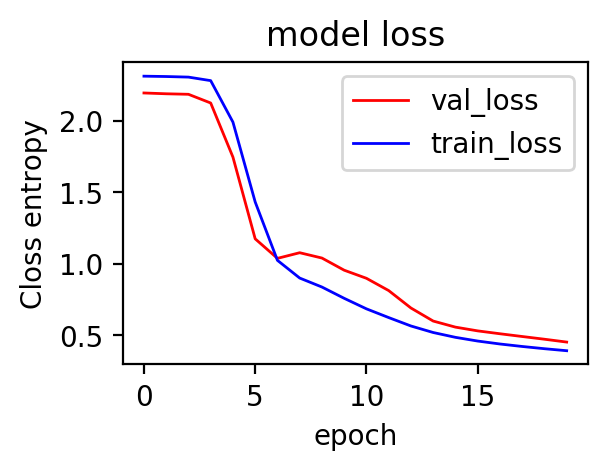

In [370]:
neural.loss_graph()

# 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

In [380]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = neural.predict(X_test)

#各指標のスコア
print('正解率:',accuracy_score(y_pred, y_test))
print('適合率:',precision_score(y_pred, y_test, average='macro'))
print('再現率:',recall_score(y_pred, y_test, average='macro'))
print('F1スコア:',f1_score(y_pred, y_test, average='macro'))

正解率: 0.9076
適合率: 0.9057952555860401
再現率: 0.9069319567600488
F1スコア: 0.9057864981630788


# （オプション）誤分類の確認
誤分類した画像はどのようなものだったかを見てみましょう。推定値を用意し、以下のコードを実行してください。

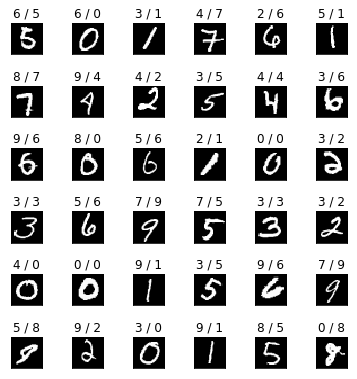

In [385]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # いくつ表示するか

true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')